<a href="https://colab.research.google.com/github/Prarabdhaa/Data-Exploration/blob/master/dnn_swat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_excel('SWaT_Dataset_Attack_v0.xlsx')

In [3]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [4]:
df.head(5)

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,P201,P202,P203,P204,P205,P206,DPIT301,FIT301,LIT301,MV301,MV302,MV303,MV304,P301,P302,AIT401,AIT402,FIT401,LIT401,P401,P402,P403,P404,UV401,AIT501,AIT502,AIT503,AIT504,FIT501,FIT502,FIT503,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
1,28/12/2015 10:00:00 AM,2.42706,522.847,2,2,1,262.016,8.39644,328.634,2.44539,2,1,1,2,1,2,1,19.7484,2.20683,956.165,1,2,1,1,1,2,148.808,156.088,1.71352,942.066,1,2,1,1,2,7.87862,145.117,264.548,12.0354,1.72379,1.27962,0.735269,0.307786,2,1,250.865,1.64995,189.599,0.000128152,1,1,1,Normal
2,28/12/2015 10:00:01 AM,2.44627,522.886,2,2,1,262.016,8.39644,328.634,2.44539,2,1,1,2,1,2,1,19.7484,2.20824,956.165,1,2,1,1,1,2,148.808,156.088,1.71595,942.028,1,2,1,1,2,7.87862,145.117,264.548,12.0354,1.72379,1.29755,0.735269,0.307786,2,1,250.865,1.64995,189.679,0.000128152,1,1,1,Normal
3,28/12/2015 10:00:02 AM,2.48919,522.847,2,2,1,262.016,8.39451,328.634,2.44232,2,1,1,2,1,2,1,19.6908,2.20863,956.486,1,2,1,1,1,2,148.808,156.088,1.71595,941.874,1,2,1,1,2,7.87862,145.117,264.548,12.0354,1.7234,1.29397,0.735269,0.308619,2,1,250.881,1.64995,189.679,0.000128152,1,1,1,Normal
4,28/12/2015 10:00:03 AM,2.53435,522.965,2,2,1,262.016,8.39451,328.634,2.44232,2,1,1,2,1,2,1,19.6908,2.20863,956.806,1,2,1,1,1,2,148.808,156.088,1.71467,941.797,1,2,1,1,2,7.87862,145.014,264.548,12.0354,1.7234,1.28116,0.735269,0.308619,2,1,250.881,1.64995,189.615,0.000128152,1,1,1,Normal
5,28/12/2015 10:00:04 AM,2.56926,523.475,2,2,1,262.016,8.39451,328.634,2.44308,2,1,1,2,1,2,1,19.6908,2.20863,957.086,1,2,1,1,1,2,148.808,156.088,1.71467,942.22,1,2,1,1,2,7.87862,144.886,264.548,12.0354,1.7234,1.28116,0.735269,0.308619,2,1,250.881,1.64995,189.503,0.000128152,1,1,1,Normal


In [5]:
df = df.drop(df.columns[0], axis=1)

In [6]:
df.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,P201,P202,P203,P204,P205,P206,DPIT301,FIT301,LIT301,MV301,MV302,MV303,MV304,P301,P302,AIT401,AIT402,FIT401,LIT401,P401,P402,P403,P404,UV401,AIT501,AIT502,AIT503,AIT504,FIT501,FIT502,FIT503,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
1,2.42706,522.847,2,2,1,262.016,8.39644,328.634,2.44539,2,1,1,2,1,2,1,19.7484,2.20683,956.165,1,2,1,1,1,2,148.808,156.088,1.71352,942.066,1,2,1,1,2,7.87862,145.117,264.548,12.0354,1.72379,1.27962,0.735269,0.307786,2,1,250.865,1.64995,189.599,0.000128152,1,1,1,Normal
2,2.44627,522.886,2,2,1,262.016,8.39644,328.634,2.44539,2,1,1,2,1,2,1,19.7484,2.20824,956.165,1,2,1,1,1,2,148.808,156.088,1.71595,942.028,1,2,1,1,2,7.87862,145.117,264.548,12.0354,1.72379,1.29755,0.735269,0.307786,2,1,250.865,1.64995,189.679,0.000128152,1,1,1,Normal
3,2.48919,522.847,2,2,1,262.016,8.39451,328.634,2.44232,2,1,1,2,1,2,1,19.6908,2.20863,956.486,1,2,1,1,1,2,148.808,156.088,1.71595,941.874,1,2,1,1,2,7.87862,145.117,264.548,12.0354,1.7234,1.29397,0.735269,0.308619,2,1,250.881,1.64995,189.679,0.000128152,1,1,1,Normal
4,2.53435,522.965,2,2,1,262.016,8.39451,328.634,2.44232,2,1,1,2,1,2,1,19.6908,2.20863,956.806,1,2,1,1,1,2,148.808,156.088,1.71467,941.797,1,2,1,1,2,7.87862,145.014,264.548,12.0354,1.7234,1.28116,0.735269,0.308619,2,1,250.881,1.64995,189.615,0.000128152,1,1,1,Normal
5,2.56926,523.475,2,2,1,262.016,8.39451,328.634,2.44308,2,1,1,2,1,2,1,19.6908,2.20863,957.086,1,2,1,1,1,2,148.808,156.088,1.71467,942.22,1,2,1,1,2,7.87862,144.886,264.548,12.0354,1.7234,1.28116,0.735269,0.308619,2,1,250.881,1.64995,189.503,0.000128152,1,1,1,Normal


In [7]:
len(df.columns)

52

In [8]:
list_col = []
for cols in df.columns:
  if(df[cols].nunique()<2):
    print(cols)
    list_col.append(cols)
df = df.drop(columns=list_col)

 P202
P301
P401
P404
P502
P601
P603


In [9]:
len(df.columns)

45

In [10]:
df['Normal/Attack'].unique()

array(['Normal', 'Attack', 'A ttack'], dtype=object)

In [11]:
df['Normal/Attack'] = df['Normal/Attack'].str.replace(' ', '')

In [12]:
df['Normal/Attack'].unique()

array(['Normal', 'Attack'], dtype=object)

In [13]:
df = df.infer_objects() 
#print(df.dtypes)  

In [14]:
df['out'] = df['Normal/Attack'].astype('category').cat.codes

In [15]:
len(df.columns)

46

In [16]:
df['out'].unique()

array([1, 0], dtype=int8)

In [17]:
#drop output column (string type)
df = df.drop(df.columns[44], axis=1)

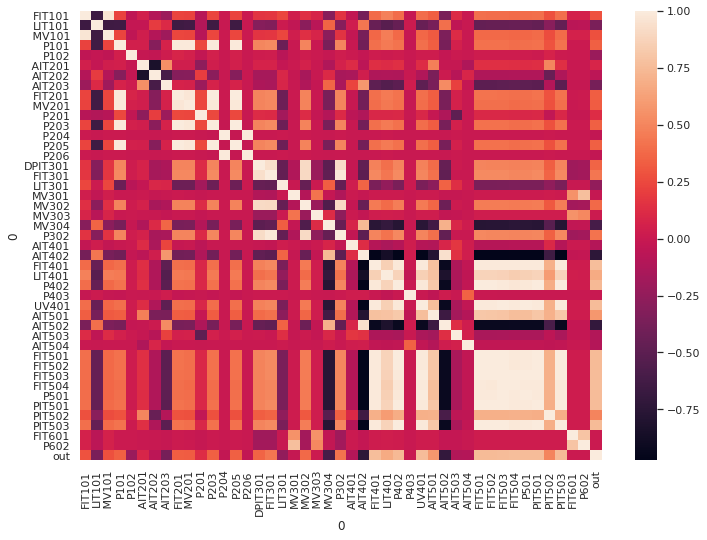

In [18]:
sns.set()
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax)

In [19]:
for cols in df.columns:
  print(cols, df[cols].nunique())

FIT101 2788
LIT101 9843
 MV101 3
P101 2
P102 2
 AIT201 2137
AIT202 965
AIT203 2584
FIT201 3144
 MV201 3
 P201 2
P203 2
 P204 2
P205 2
P206 2
DPIT301 4478
FIT301 5638
LIT301 7274
MV301 3
MV302 3
 MV303 3
MV304 3
P302 2
AIT401 17
AIT402 3166
FIT401 590
LIT401 12772
P402 2
P403 2
UV401 2
AIT501 1578
AIT502 2721
AIT503 1123
AIT504 331
FIT501 670
FIT502 1199
FIT503 313
FIT504 217
P501 2
PIT501 946
PIT502 81
PIT503 869
FIT601 3696
P602 2
out 2


In [20]:
test = df['out']
train = df.drop(df.columns[44], axis=1)

In [21]:
encode = []
scale = []
for col in train.columns:
  if(train[col].nunique()<5):
    encode.append(col)
  else:
    scale.append(col)
print(scale)
print(encode)

['FIT101', 'LIT101', ' AIT201', 'AIT202', 'AIT203', 'FIT201', 'DPIT301', 'FIT301', 'LIT301', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'PIT501', 'PIT502', 'PIT503', 'FIT601']
[' MV101', 'P101', 'P102', ' MV201', ' P201', 'P203', ' P204', 'P205', 'P206', 'MV301', 'MV302', ' MV303', 'MV304', 'P302', 'P402', 'P403', 'UV401', 'P501', 'P602']


Training & Testing

In [22]:
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [23]:
#df_n = df[df['out'] == 1]
#df_a = df[df['out'] == 0]
#test_a = df_a['out']
#train_a = df_a.drop(df_a.columns[44], axis=1)
#test_n = df_n['out']
#train_n = df_n.drop(df_n.columns[44], axis=1)
#train_x = pd.concat([X_train_a, X_train_n])
#test_x = pd.concat([X_test_a, X_test_n])
#train_y = pd.concat([y_train_a, y_train_n])
#test_y = pd.concat([y_test_a, y_test_n])
#df = df.sample(frac = 1) 


In [24]:
train_x, test_x, train_y, test_y = train_test_split(train, test, stratify=test, test_size=0.25, shuffle = True,  random_state=42)

In [25]:
print(len(train_x)+len(test_x))

449919


In [26]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False)

# Scale and Encode Separate Columns
scaled_train  = scaler.fit_transform(train_x[scale]) 
encoded_train = ohe.fit_transform(train_x[encode])

scaled_test = scaler.fit_transform(test_x[scale]) 
encoded_test = ohe.fit_transform(test_x[encode])

In [27]:
X = np.concatenate([scaled_train, encoded_train], axis=1)
test_X = np.concatenate([scaled_test, encoded_test], axis=1)

Y = to_categorical(train_y)
test_Y = to_categorical(test_y)

In [28]:
col_num = X.shape[1]
col_num

69

In [29]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(10, activation='relu', input_shape=(col_num,)))
#Second  Hidden Layer
classifier.add(Dense(10, activation='relu'))
#Third  Hidden Layer
classifier.add(Dense(10, activation='relu'))
#Output Layer
classifier.add(Dense(2, activation='softmax'))

In [30]:
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [31]:
classifier.fit(X, Y, batch_size=10, epochs=1, validation_split=0.2)

26996/26996 [==============================] - 40s 1ms/step - loss: 0.0754 - accuracy: 0.9798 - val_loss: 0.0605 - val_accuracy: 0.9843


In [32]:
y_pred=classifier.predict(test_X)
y_pred =(y_pred>0.5)

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_Y.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)

[[12107  1548]
 [  224 98601]]
